In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ZebraLib as zb
from scipy.integrate import quad, solve_ivp
import scipy.io

#Dados
mat_5 = scipy.io.loadmat('D:/UNESP/EngMec-UNESP/Controle Sistemas/Laboratórios/Lab 1 - Motores/leitura_motor_5V.mat')
mat_9 = scipy.io.loadmat('D:/UNESP/EngMec-UNESP/Controle Sistemas/Laboratórios/Lab 1 - Motores/leitura_motor_9V.mat')

w5, t5 = mat_5['w_motor'][0], mat_5['t'][0]
w9, t9 = mat_9['w_motor'][0], mat_9['t'][0]

### Plot dos sinais experimentais de ambos os motores

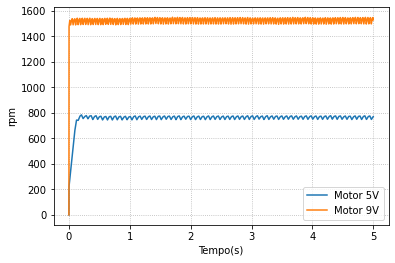

In [3]:
fig, ax = plt.subplots()
ax.set(xlabel='Tempo(s)', ylabel='rpm')

ax.plot(t5, w5, label='Motor 5V')
ax.plot(t9, w9, label='Motor 9V')
ax.legend()
ax.grid(ls='dotted')

fig.savefig('exp_geral.pdf', bbox_inches='tight', dpi=600)

### Cálculo dos coef. para o motor de 5V

In [ ]:
def modelo(t, args):
    A, K, tau = args
    return A*K*(1 - np.e**(-t/tau))

(5, 153.0765368361123, 0.058)


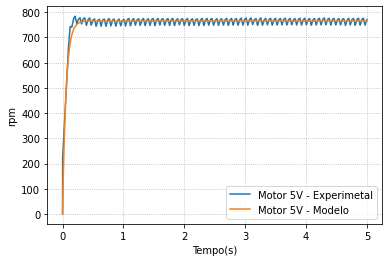

In [4]:
#Encontrando os valores de K e tau para motor 5V
A5 = 5
K5 = w5[3000::].mean()/A5
emp_w_tau = 0.632*A5*K5
index = zb.get_index_of_nearest_element(w5, emp_w_tau)
tau5 = t5[index]

#Gráfico
fig, ax = plt.subplots()
ax.set(xlabel='Tempo(s)', ylabel='rpm')

new_t5 = np.linspace(0, t5.max(), len(t5))
ax.plot(t5, w5, label='Motor 5V - Experimetal')
ax.plot(new_t5, modelo(new_t5, (A5, K5, tau5)), label='Motor 5V - Modelo')
ax.legend()
ax.grid(ls='dotted')

print((A5, K5, tau5))
fig.savefig('motor5V.pdf', bbox_inches='tight', dpi=600)

### Cálculo dos coef. para o motor de 9V

(9, 169.59644448770453, 0.001)


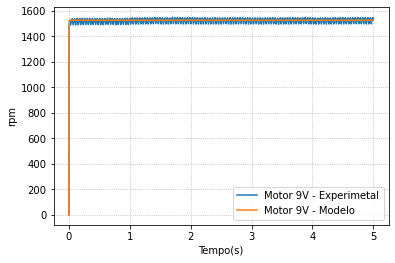

In [5]:
#Encontrando os valores de k e tau para motor 9V
A9 = 9
K9 = w9[3000::].mean()/A9
emp_w_tau = 0.632*A9*K9
index = zb.get_index_of_nearest_element(w9, emp_w_tau)
tau9 = t9[index]

#Gráfico
fig, ax = plt.subplots()
ax.set(xlabel='Tempo(s)', ylabel='rpm')

new_t9 = np.linspace(0, t9.max(), len(t9))
ax.plot(t9, w9, label='Motor 9V - Experimetal')
ax.plot(new_t9, modelo(new_t9, (A9, K9, tau9)), label='Motor 9V - Modelo')
ax.legend()
ax.grid(ls='dotted')

print((A9, K9, tau9))
fig.savefig('motor9V.pdf', bbox_inches='tight', dpi=600)

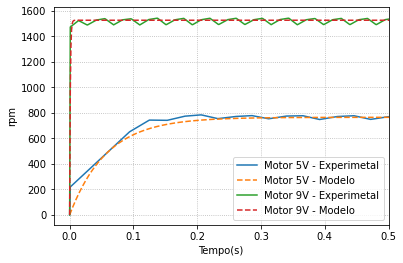

In [6]:
#Gráfico
fig, ax = plt.subplots()
ax.set(xlabel='Tempo(s)', ylabel='rpm', xlim=(-0.025,0.5))

ax.plot(t5, w5, label='Motor 5V - Experimetal')
ax.plot(new_t5, modelo(new_t5, (A5, K5, tau5)), ls='--', label='Motor 5V - Modelo')
ax.plot(t9, w9, label='Motor 9V - Experimetal')
ax.plot(new_t9, modelo(new_t9, (A9, K9, tau9)), ls='--', label='Motor 9V - Modelo')
ax.legend()
ax.grid(ls='dotted')
fig.savefig('analise_total.pdf', bbox_inches='tight', dpi=600)